\begin{center}
Gabe Morris
\end{center}

In [1]:
# Notebook Preamble
%config ZMQInteractiveShell.ast_node_interactivity = 'all'
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

t, s = sp.symbols('t s')

plt.style.use('maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6643 & Homework 9 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 10.4
## Given

\begin{center}
\includegraphics{images/fig1}
\end{center}

## Find
Derive the output $C(s)$, error $E(s)$, and actuator $M(s)$ equations for the diagram above and obtain the characteristic polynomial.

## Solution
The output of the functions mentioned above may be acquired using algebra of the block diagram.

In [2]:
# Use algebra to determine the functions
K = sp.Symbol('K')
R, E, F, M, D, C, T = [sp.Function(i)(s) for i in ['R', 'E', 'F', 'M', 'D', 'C', 'T']]
eq1 = sp.Eq(E, R - C)
eq1
eq2 = sp.Eq(F, E*K)
eq2
eq3 = sp.Eq(M, F*4/(3*s + 1))
eq3
eq4 = sp.Eq(C, (M - D)*6/(15*s + 2))
eq4

Eq(E(s), -C(s) + R(s))

Eq(F(s), K*E(s))

Eq(M(s), 4*F(s)/(3*s + 1))

Eq(C(s), (-6*D(s) + 6*M(s))/(15*s + 2))

The characteristic polynomial may be determined by solving for $\frac{C(s)}{R(s)}$.

In [3]:
subs = eq4.subs([
    (M, eq3.rhs),
    (F, eq2.rhs),
    (E, eq1.rhs),
    (C, T*R)
])
sol = sp.solve(subs, T)[0]
sp.Eq(T, sol)

Eq(T(s), 6*(4*K*R(s) - 3*s*D(s) - D(s))/((24*K + 45*s**2 + 21*s + 2)*R(s)))

$\frac{C(s)}{R(s)}$ may be obtained by setting $D(s)$ equal to 0.

In [4]:
sp.Eq(C/R, sol.subs(D, 0))

Eq(C(s)/R(s), 24*K/(24*K + 45*s**2 + 21*s + 2))

It is not necessary to try and rewrite $E(s)$, $M(s)$, and $F(s)$ in any other forms. The denominator of the $\frac{C(s)}{R(s)}$ function above is the characteristic polynomial,

$$45s^2+21s+2+24K$$

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 6643 & Homework 9 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 10.11
## Given

\begin{center}
\includegraphics{images/fig2}
\end{center}

## Find
a. Determine the resistance values to obtain an op-amp PID controller with $K_P=10$, $K_I=1.4$, and $K_D=4$. The circuit should limit frequencies above 100 rad/s. Take one capacitance to be $1\,\mu F$.
b. Plot the frequency response of the circuit.

## Solution
Using the relationships on page 646, we can obtain 4 equations and 4 unknowns.

In [5]:
C, R1, R2, R, C1, beta = sp.symbols(r'C R_1 R_2 R C_1 \beta')
Vo, Vi = sp.Function('V_o')(s), sp.Function('V_i')(s)
KP = beta*(R*C + R2*C1)/(R2*C)
eq1 = sp.Eq(KP, 10)
KI = beta/(R2*C)
eq2 = sp.Eq(KI, 1.4)
KD = beta*R*C1
eq3 = sp.Eq(KD, 4)
eq4 = sp.Eq(beta, R2/(R1 + R2))
eq1
eq2
eq3
eq4

Eq(\beta*(C*R + C_1*R_2)/(C*R_2), 10)

Eq(\beta/(C*R_2), 1.4)

Eq(C_1*R*\beta, 4)

Eq(\beta, R_2/(R_1 + R_2))

Solving the system in terms of $C$ and $C_1$,

In [6]:
sol = sp.solve([eq1, eq2, eq3, eq4], (R1, R2, R, beta), dict=True)[-1]
for key, value in sol.items():
    sp.Eq(key, value)

Eq(R_1, 0.142857142857143*(-2.97728445445476*C + 5.0*C_1)/(C*C_1))

Eq(R_2, 0.425326350636394/C_1)

Eq(R, 6.71753079222075/C)

Eq(\beta, 0.595456890890952*C/C_1)

Choosing $C=1\cdot 10^{-6}\,\mu F$,

In [7]:
sol2 = {k: v.subs(C, 1e-6) for k, v in sol.items()}
for key, value in sol2.items():
    sp.Eq(key, value)

Eq(R_1, 142857.142857143*(5.0*C_1 - 2.97728445445476e-6)/C_1)

Eq(R_2, 0.425326350636394/C_1)

Eq(R, 6717530.79222075)

Eq(\beta, 5.95456890890952e-7/C_1)

Since $R_1$ has to be greater than 0, we can use the first equation above to solve for $C_1$ where $R_1$ is 0.

In [8]:
C1_lower = sp.solve(sol2[R1], C1)[0]
C1_lower

5.95456890890952e-7

Notice from the figure above, the natural frequency of the system is $\frac{1}{\beta R_1C_1}$. This means that we need to choose a value for $C_1$ such that $\frac{1}{\beta R_1C_1}\ge 100$.

In [9]:
C1_upper = sp.solve(1/(sol2[beta]*sol2[R1]*C1) - 100, C1)[0]
C1_upper

6.09793975209791e-7

Therefore, $C_1=6\cdot10^{-7}\,F$ is a worthy option. The selections for the resistors and capacitors are,

In [10]:
C1_ = 6e-7
for key, value in sol2.items():
    sp.Eq(key, value.subs(C1, C1_))
sp.Eq(C1, C1_)
sp.Eq(C, 1e-6)

Eq(R_1, 5408.46322505693)

Eq(R_2, 708877.251060657)

Eq(R, 6717530.79222075)

Eq(\beta, 0.99242815148492)

Eq(C_1, 6.0e-7)

Eq(C, 1.0e-6)

### Frequency Response
Going back to the original transfer function,

In [11]:
%config ZMQInteractiveShell.ast_node_interactivity = 'last_expr'
T = (-(KP + KI/s + KD*s)*1/(beta*R1*C1*s + 1)).subs(beta, R2/(R1 + R2))
sp.Eq(Vo/Vi, T.simplify())  # K values are substituted
T_ = T.subs([
    (R1, sol2[R1].subs(C1, C1_)),
    (R2, sol2[R2].subs(C1, C1_)),
    (R, sol2[R].subs(C1, C1_)),
    (C, 1e-6),
    (C1, C1_)
])
sp.Eq(Vo/Vi, T_)
w = sp.Symbol(r'\omega')
T_jw = T_.subs(s, sp.I*w)
sp.Eq(sp.Function('T')(sp.I*w), T_jw)

Eq(V_o(s)/V_i(s), (-C*C_1*R*R_2*s**2 - s*(C*R + C_1*R_2) - 1)/(C*s*(C_1*R_1*R_2*s + R_1 + R_2)))

Eq(V_o(s)/V_i(s), (-4.0*s - 10.0 - 1.4/s)/(0.00322050669649045*s + 1))

Eq(T(I*\omega), (-4.0*I*\omega - 10.0 + 1.4*I/\omega)/(0.00322050669649045*I*\omega + 1))

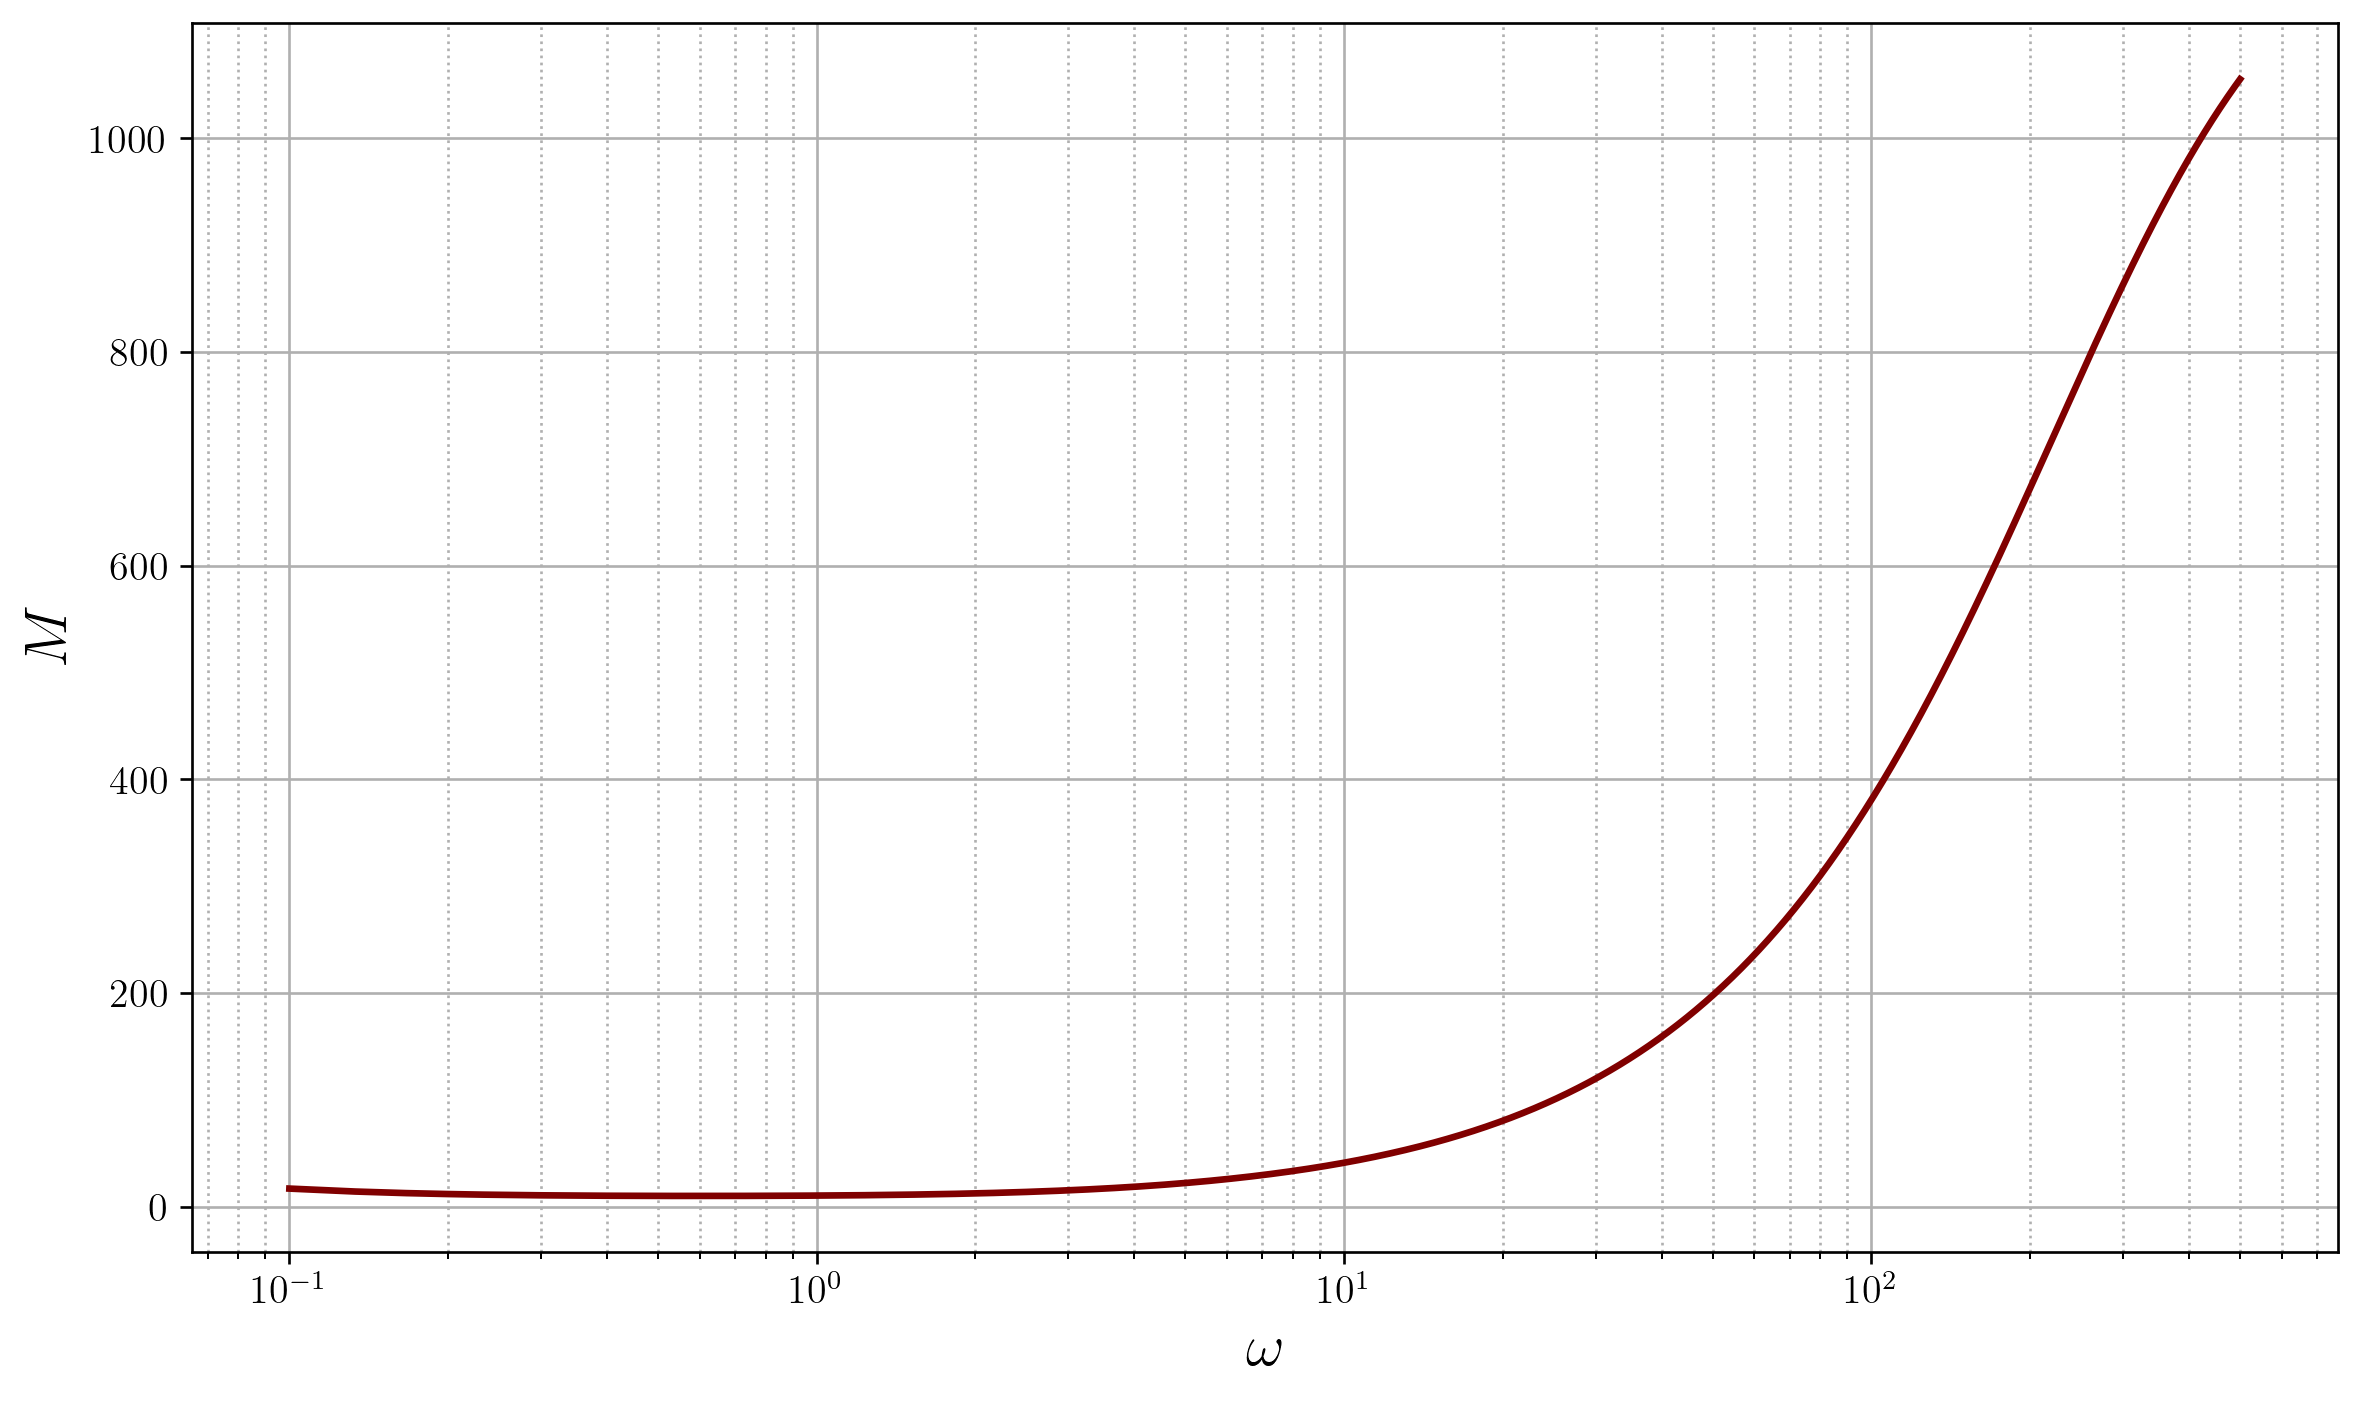

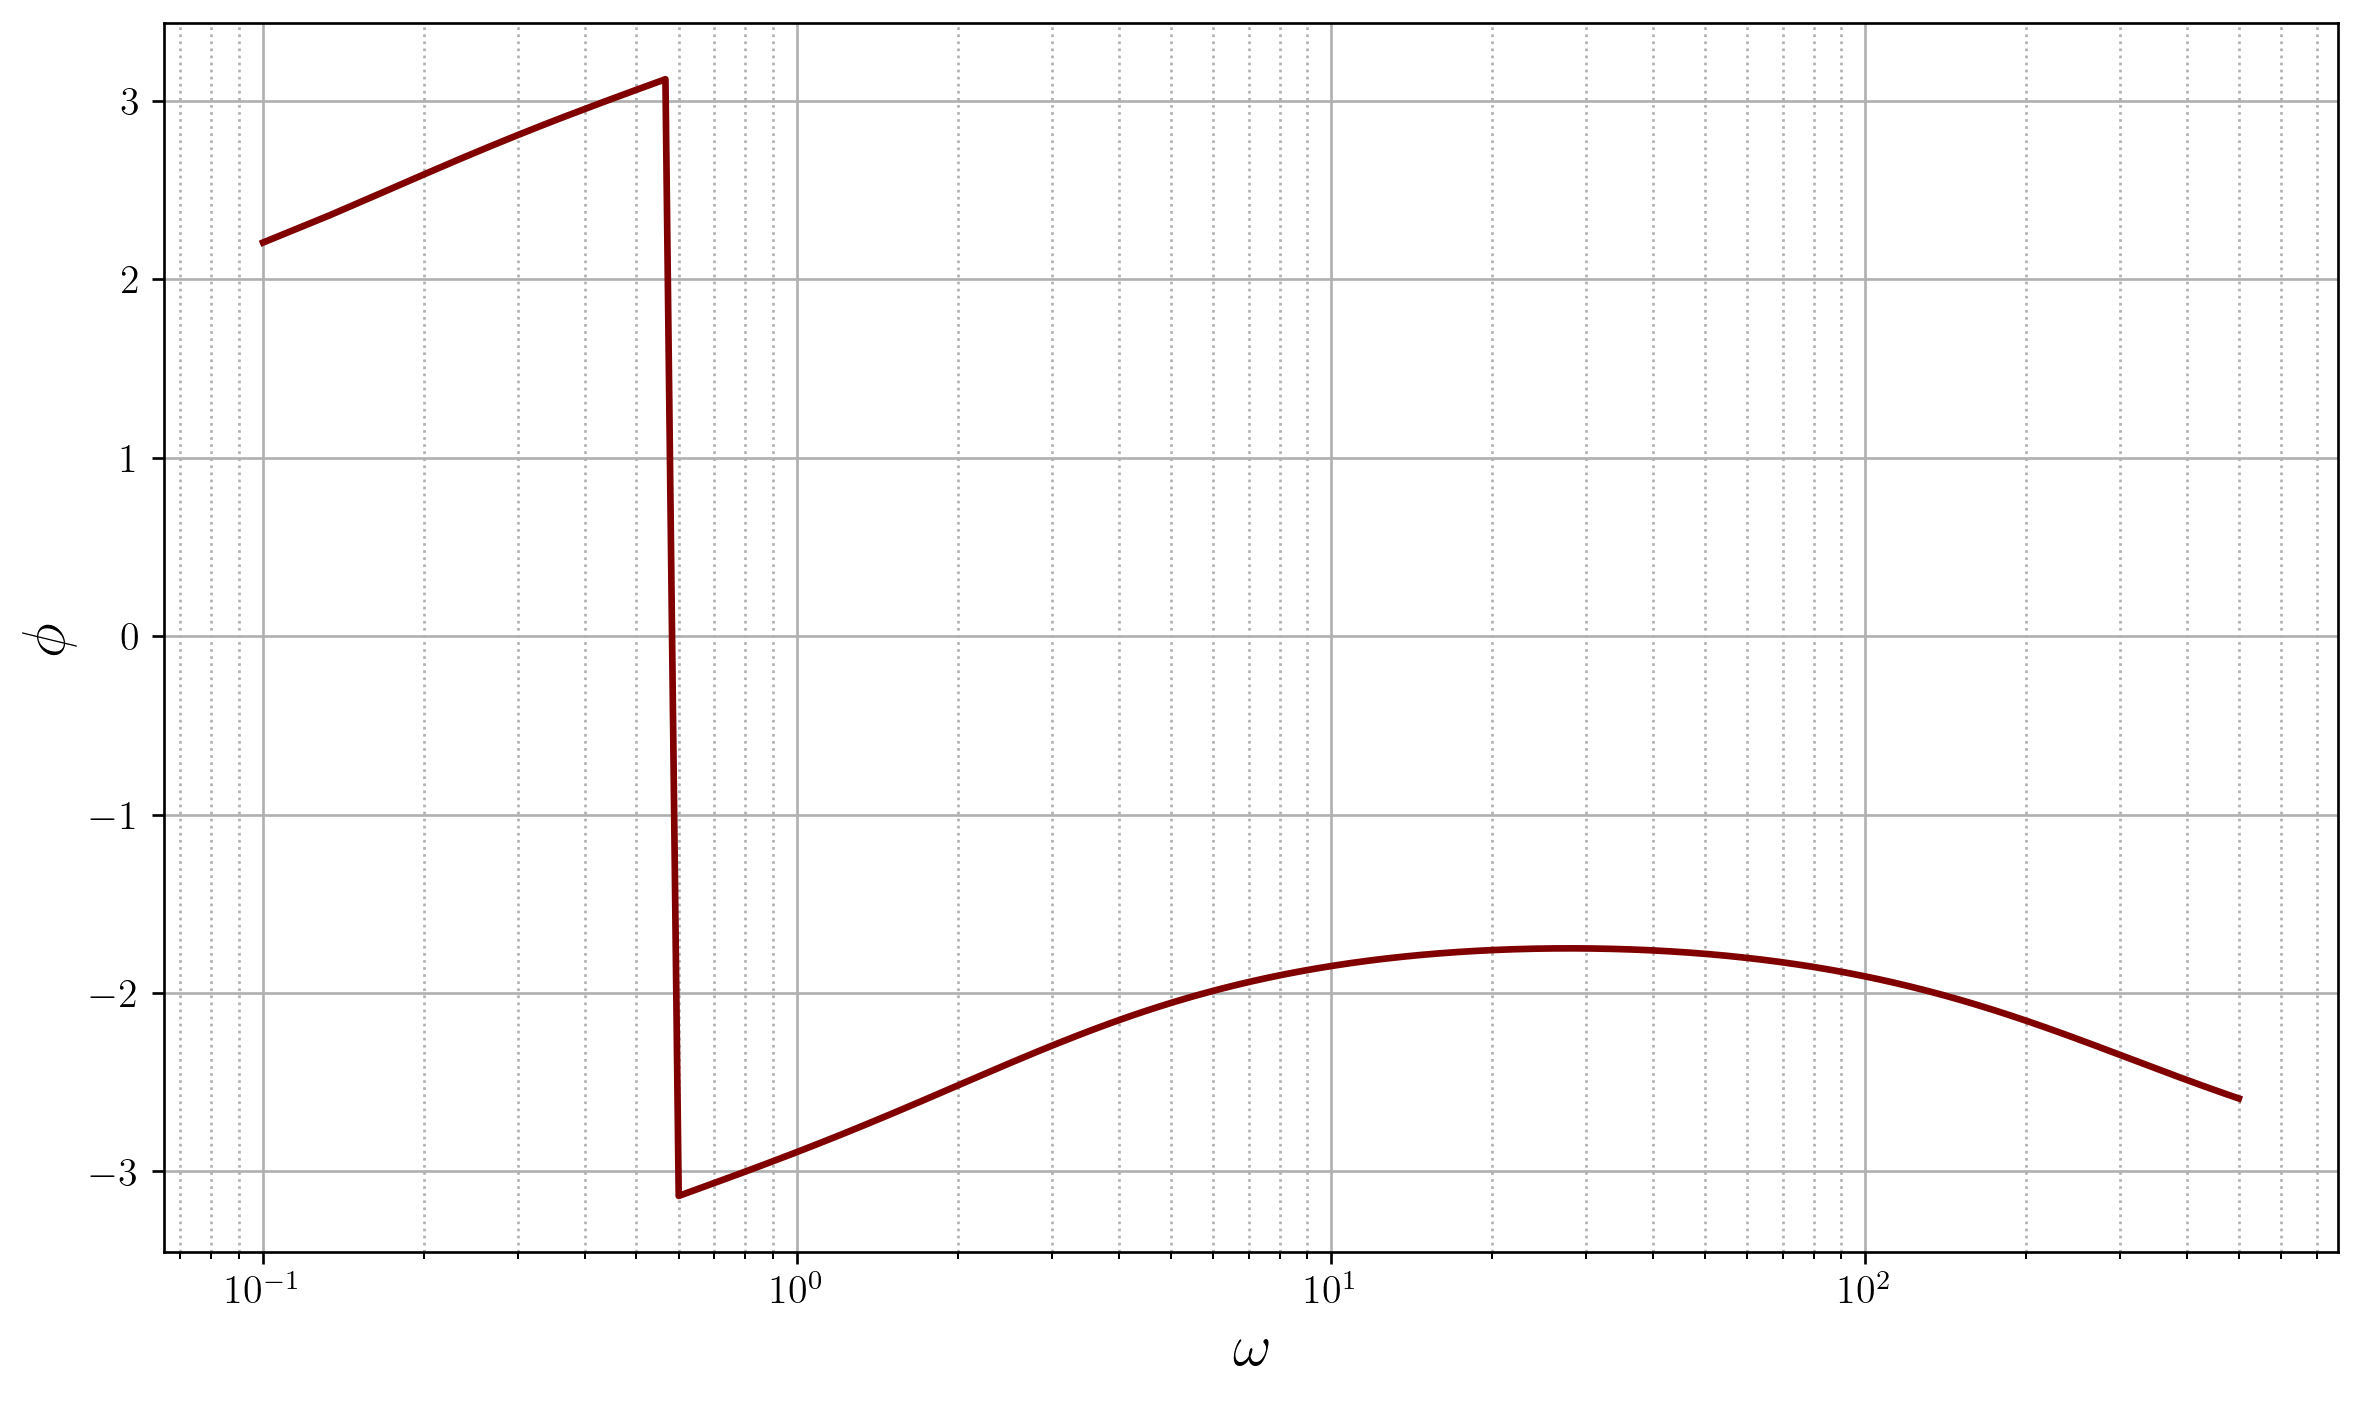

In [12]:
%config ZMQInteractiveShell.ast_node_interactivity = 'all'
mag = sp.Abs(T_jw)
phi = sp.arg(T_jw)
mag_lamb = sp.lambdify(w, mag, modules='numpy')
phi_lamb = sp.lambdify(w, phi, modules='numpy')
w_range = np.linspace(0.1, 500, 15_000)

fig1, ax1 = plt.subplots()
ax1.plot(w_range, mag_lamb(w_range))
ax1.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$M$')
ax1.set_xscale('log')
ax1.grid(which='minor', ls=':')

fig2, ax2 = plt.subplots()
ax2.plot(w_range, phi_lamb(w_range))
ax2.set_xlabel(r'$\omega$')
ax2.set_ylabel(r'$\phi$')
ax2.set_xscale('log')
ax2.grid(which='minor', ls=':')

plt.show()

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 6643 & Homework 9 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 10.12 Part B and Part D
## Given
b. $\frac{Y(s)}{F(s)}=\frac{8s-5}{10s^2+4s+7}$ and $f(t)=8u_s(t)$
d. $\frac{Y(s)}{F(s)}=\frac{5s+8}{s^2+2s-9}$ and $f(t)=8u_s(t)$

## Find
The steady state response if possible.

## Solution
The steady state is possible if the system is stable (all roots of the characteristic equation have negative real parts).

### Part B

In [13]:
T_b = (8*s - 5)/(10*s**2 + 4*s + 7)
F = 8/s
T_b
poly = sp.fraction(T_b)[1]
poly
for root in sp.roots(poly):
    root

(8*s - 5)/(10*s**2 + 4*s + 7)

10*s**2 + 4*s + 7

-1/5 - sqrt(66)*I/10

-1/5 + sqrt(66)*I/10

The steady state exists.

In [14]:
lim_b = sp.Limit(s*T_b*F, s, 0)
sp.Eq(lim_b, lim_b.doit())

Eq(Limit(8*(8*s - 5)/(10*s**2 + 4*s + 7), s, 0), -40/7)

### Part D

In [15]:
T_d = (5*s + 8)/(s**2 + 2*s - 9)
T_d
poly = sp.fraction(T_d)[1]
poly
for root in sp.roots(poly):
    root

(5*s + 8)/(s**2 + 2*s - 9)

s**2 + 2*s - 9

-sqrt(10) - 1

-1 + sqrt(10)

The final value theorem does not work because not all roots are negative.

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 6643 & Homework 9 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 10.22
## Given

\begin{center}
\includegraphics{images/fig3}
\end{center}

Suppose that $I=c=4$ for the PI controller shown above. The performance specifications require that $\tau=0.2$.

## Find
a. Compute the required gain values for each of the following cases: $\zeta=0.707$, $\zeta=1$, and a root separation factor of 10.
b. Use a computer method to plot the unit step command responses for each of the cases in part (a). Compare the performance of each case.

## Solution
The transfer function is,

In [16]:
ohm, ohm_r = sp.Function(r'\Omega')(s), sp.Function(r'\Omega_r')(s)
KP, KI = sp.symbols('K_P K_I')
eq = sp.Eq((ohm_r - ohm)*(KP + KI/s)*1/(4*s + 4), ohm)
eq
T_s = sp.Function('T')(s)
sol = sp.solve(eq.subs(ohm, T_s*ohm_r), T_s)[0]
sp.Eq(ohm/ohm_r, sol)

Eq((K_I/s + K_P)*(-\Omega(s) + \Omega_r(s))/(4*s + 4), \Omega(s))

Eq(\Omega(s)/\Omega_r(s), (K_I + K_P*s)/(K_I + K_P*s + 4*s**2 + 4*s))

### Part A
$$\tau=\frac{8}{4+K_P}=0.2$$

In [17]:
eq1 = sp.Eq(8/(4 + KP), 0.2)
eq1
KP_ = sp.solve(eq1, KP)[0]
sp.Eq(KP, KP_)

Eq(8/(K_P + 4), 0.2)

Eq(K_P, 36.0)

$$\zeta=\frac{c}{2\sqrt{mk}}$$

In [18]:
# For 0.707
eq2 = sp.Eq((4 + KP_)/(2*sp.sqrt(4*KI)), 0.707)
eq2
KI_707 = sp.solve(eq2, KI)[0]
sp.Eq(KI, KI_707)

# For 1
eq3 = sp.Eq((4 + KP_)/(2*sp.sqrt(4*KI)), 1)
eq3
KI_1 = sp.solve(eq3, KI)[0]
sp.Eq(KI, KI_1)

Eq(10.0/sqrt(K_I), 0.707)

Eq(K_I, 200.06041824631)

Eq(10.0/sqrt(K_I), 1)

Eq(K_I, 100.0)

Thus, the gain values are $K_P=36$ for $\zeta=0.707$ and $\zeta=1$ and $K_I=200$ for $\zeta=0.707$ and $K_I=100$ for $\zeta=1$. For the separation factor of 10 (this just means that the other root of the polynomial is some multiple $10\cdot other\ root$), we know that the other root is $-\frac{1}{\tau}=-5$. This means that the other root is $-5\cdot10=-50$.

In [19]:
poly = (s + 5)*(s + 50)
eq = sp.Eq(poly, poly.expand())
eq

Eq((s + 5)*(s + 50), s**2 + 55*s + 250)

But in order to compare this characteristic equation with the denominator of the transfer function, the value of $m$ must be equivalent.

$$4s^2+220s+1000$$

In [20]:
%config ZMQInteractiveShell.ast_node_interactivity = 'last_expr'
eq = sp.Eq(4 + KP, 220)
eq
KP_fact = sp.solve(eq, KP)[0]
sp.Eq(KP, KP_fact)

Eq(K_P + 4, 220)

Eq(K_P, 216)

Thus, $K_P=216$ and $K_I=1000$ for the factor of 10 case.

### Part B
The responses can be compared by looking at the plot. In the differential equation form with the unit step as the input (just the constant 1 for values greater than 0), the system is,

$$(4s^2+(4+K_P)s+K_I)\Omega(s)=(K_I+K_Ps)\frac{1}{s}$$
$$4\ddot{\omega}+(4+K_P)\dot{\omega}+K_I\omega=K_I$$

The $K_P$ value on the right-hand side goes away because the inverse laplace transform is technically $K_P\delta(t)$, but we are only considering the values greater than 0 ($K_P\delta(t)$ for t > 0 is 0).

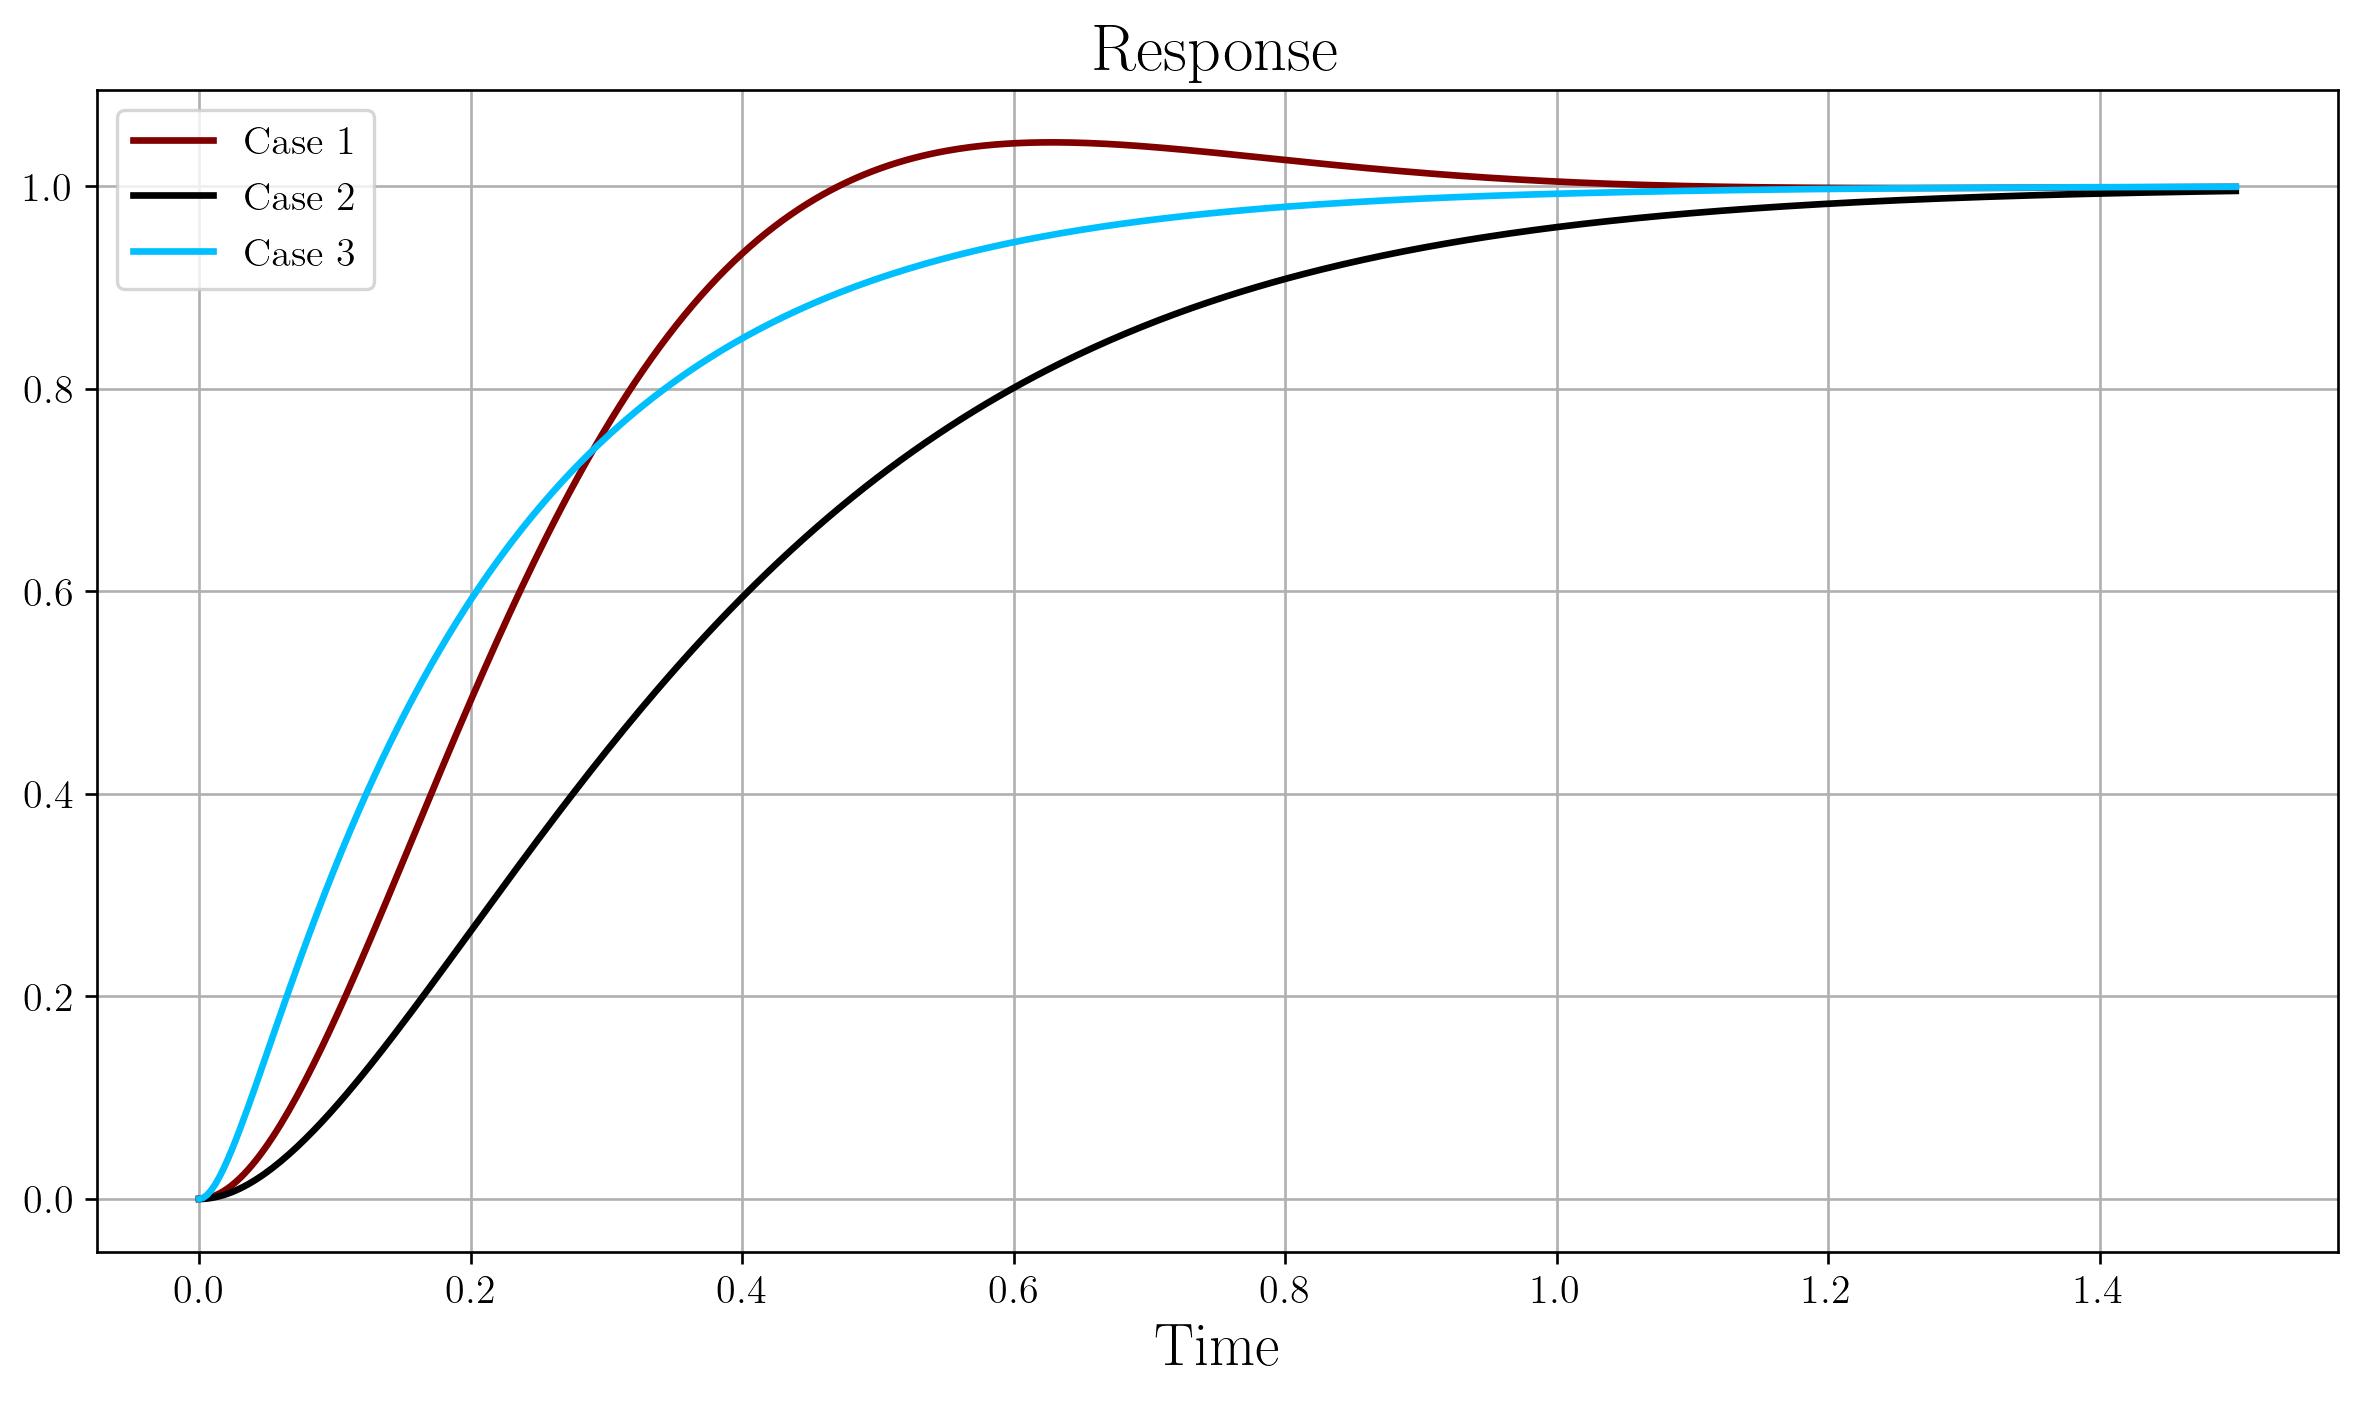

In [21]:
# The best way is to solve numerically
def diffs(x, _, KP__, KI__):
    return [
        x[1],
        1/4*(KI__ - (4 + KP__)*x[1] - KI__*x[0])
    ]

cases = [(KP_, KI_707), (KP_, KI_1), (KP_fact, 1000)]
omega = sp.Function(r'\omega')(t)
time = np.linspace(0, 1.5, 500)
fig, ax = plt.subplots()
for i, case in enumerate(cases):
    KP_value, KI_value = case
    sol = odeint(diffs, (0, 0), time, args=(KP_value, KI_value))
    ax.plot(time, sol[:, 0], label=f'Case {i+1}')
ax.set_xlabel('Time')
ax.set_title('Response')
ax.legend()
plt.show()